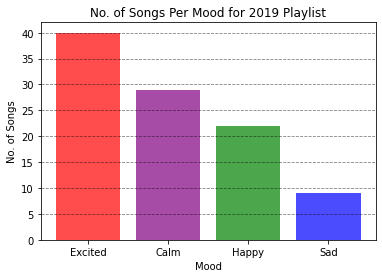

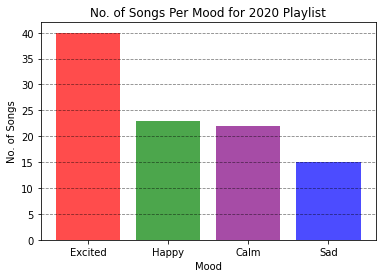

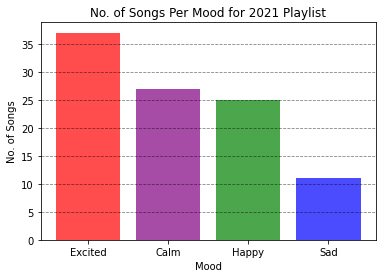

In [50]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D #used for custom legend
import pandas as pd
import seaborn as sns

def songsPerMood(csv, playlist_name): #input the file path to the CSV: e.g., 'PredictedMood/2020.csv', followed by playlist name
    df = pd.read_csv(csv)

    dance = df['danceability']
    energy = df['energy']
    loudness = df['loudness']
    speechiness = df['speechiness']
    acousticness = df['acousticness']
    instrumental = df['instrumentalness']
    tempo = df['tempo']
    valence = df['valence']
    sentiment = df['sentiment']
    mood = df['predicted_mood']

    #bar chart for num of songs in each mood
    fig, ax = plt.subplots(figsize = (6, 4))
    mood_count = mood.value_counts()
    mood_colours = {'Excited': 'red', 'Calm': 'purple', 'Happy': 'green', 'Sad': 'blue'} 
    colours = [mood_colours[mood] for mood in mood_count.index]
    ax.bar(mood_count.index, mood_count.values, color = colours, alpha = 0.7)
    ax.set(title = f'No. of Songs Per Mood for {playlist_name} Playlist', xlabel = 'Mood', ylabel = 'No. of Songs')
    ax.grid(axis = 'y', linestyle = '--', color = 'black', alpha = 0.5)

    plt.savefig(f'DataVis/Mood_Count_{playlist_name}.png', facecolor = 'white', transparent = False)
    plt.show()


songsPerMood('PredictedMood/2019.csv', '2019')
songsPerMood('PredictedMood/2020.csv', '2020')
songsPerMood('PredictedMood/2021.csv', '2021')



C:\Users\Aaron\AppData\Local\Temp/ipykernel_32232/2014919822.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = mood, y = valence, jitter = True, alpha = 0.7, palette = colours, order=order)


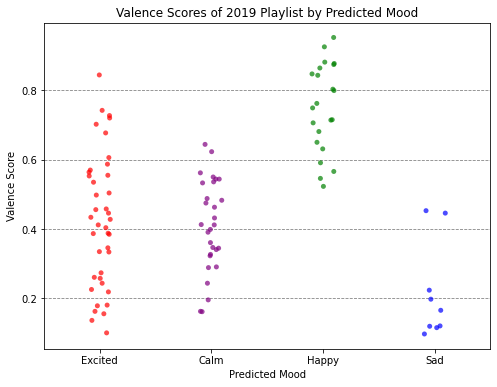

C:\Users\Aaron\AppData\Local\Temp/ipykernel_32232/2014919822.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = mood, y = valence, jitter = True, alpha = 0.7, palette = colours, order=order)


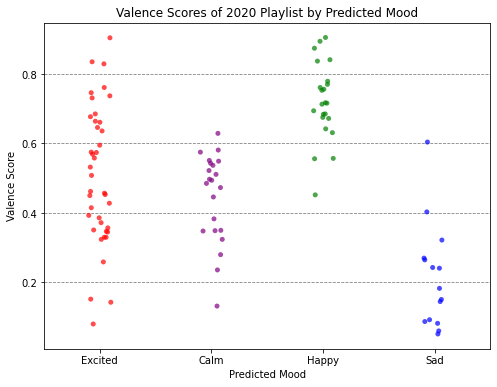

C:\Users\Aaron\AppData\Local\Temp/ipykernel_32232/2014919822.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = mood, y = valence, jitter = True, alpha = 0.7, palette = colours, order=order)


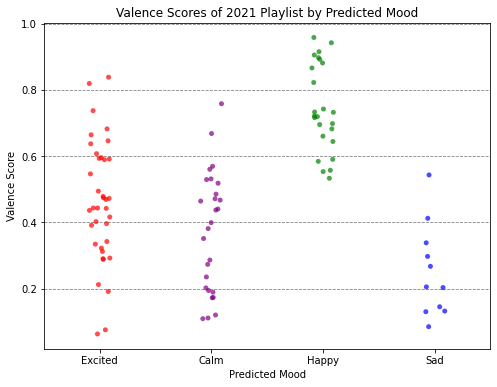

In [51]:
def valenceMoodJitter(csv, playlist_name): #jitter plot to show valence against the moods
    df = pd.read_csv(csv)

    valence = df['valence']
    mood = df['predicted_mood']

    colours = {'Excited': 'red', 'Calm': 'purple', 'Happy': 'green', 'Sad': 'blue'}
    order = ['Excited', 'Calm', 'Happy', 'Sad']

    fig, ax = plt.subplots(figsize = (8, 6))
    sns.stripplot(x = mood, y = valence, jitter = True, alpha = 0.7, palette = colours, order=order)
    ax.set(title = f'Valence Scores of {playlist_name} Playlist by Predicted Mood', xlabel = 'Predicted Mood', ylabel = 'Valence Score')
    ax.grid(axis = 'y', linestyle = '--', color = 'black', alpha = 0.5)
    plt.savefig(f'DataVis/ValenceMood_Jitter_{playlist_name}.png', facecolor = 'white', transparent = False)
    plt.show()

valenceMoodJitter('PredictedMood/2019.csv', '2019')
valenceMoodJitter('PredictedMood/2020.csv', '2020')
valenceMoodJitter('PredictedMood/2021.csv', '2021')

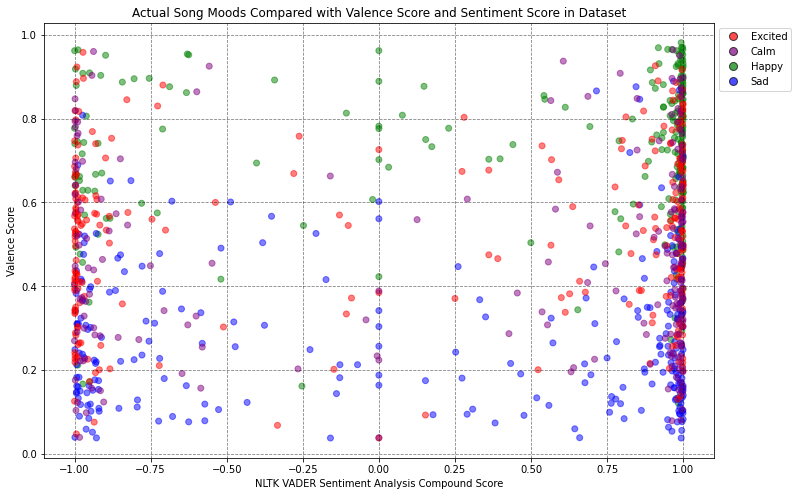

In [52]:
#scatter plot for the actual song moods over the valence scores against sentiment analysis scores, using Dataset.csv 
df = pd.read_csv('PlaylistDatasets/Dataset.csv')

valence = df['valence']
sentiment = df['sentiment']
mood = df['mood']

colours = [] #assigning colours to each mood to show 3 variables in the scatter
for i in mood:
    if i == 'Excited':
        colours.append('red')
    elif i == 'Calm':
        colours.append('purple')
    elif i == 'Happy':
        colours.append('green')
    elif i == 'Sad':
        colours.append('blue')

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(sentiment, valence, c=colours, alpha = 0.5)
ax.set(title = 'Actual Song Moods Compared with Valence Score and Sentiment Score in Dataset', xlabel = 'NLTK VADER Sentiment Analysis Compound Score', ylabel = 'Valence Score')
ax.grid(axis = 'both', linestyle = '--', color = 'black', alpha = 0.5)

#manually adding moods to the legend
legend = [
    Line2D([0], [0], marker='o', color='none', label='Excited', markerfacecolor='red', markersize=8, alpha = 0.7),
    Line2D([0], [0], marker='o', color='none', label='Calm', markerfacecolor='purple', markersize=8, alpha = 0.7),
    Line2D([0], [0], marker='o', color='none', label='Happy', markerfacecolor='green', markersize=8, alpha = 0.7),
    Line2D([0], [0], marker='o', color='none', label='Sad', markerfacecolor='blue', markersize=8, alpha = 0.7)
    ]
ax.legend(handles=legend, bbox_to_anchor=(1, 1))

plt.savefig('DataVis/ValenceSentimentMood_Scatter_Dataset.png', facecolor = 'white', transparent = False)
plt.show()

    

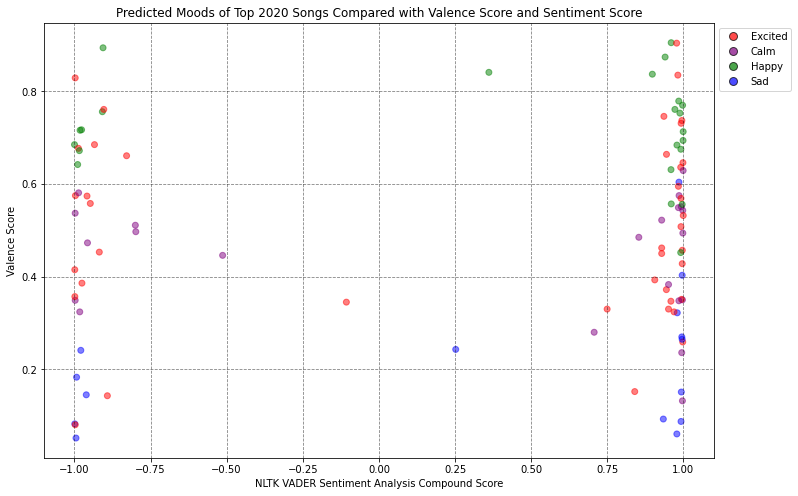

In [53]:
#scatter plot for the the predicted moods in 2020.csv over the valence scores against sentiment analysis scores
df = pd.read_csv('PredictedMood/2020.csv')

valence = df['valence']
sentiment = df['sentiment']
mood = df['predicted_mood']

colours = []
for i in mood:
    if i == 'Excited':
        colours.append('red')
    elif i == 'Calm':
        colours.append('purple')
    elif i == 'Happy':
        colours.append('green')
    elif i == 'Sad':
        colours.append('blue')

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(sentiment, valence, c=colours, alpha = 0.5)
ax.set(title = 'Predicted Moods of Top 2020 Songs Compared with Valence Score and Sentiment Score', xlabel = 'NLTK VADER Sentiment Analysis Compound Score', ylabel = 'Valence Score')
ax.grid(axis = 'both', linestyle = '--', color = 'black', alpha = 0.5)

#manually adding moods to the legend
legend = [
    Line2D([0], [0], marker='o', color='none', label='Excited', markerfacecolor='red', markersize=8, alpha = 0.7),
    Line2D([0], [0], marker='o', color='none', label='Calm', markerfacecolor='purple', markersize=8, alpha = 0.7),
    Line2D([0], [0], marker='o', color='none', label='Happy', markerfacecolor='green', markersize=8, alpha = 0.7),
    Line2D([0], [0], marker='o', color='none', label='Sad', markerfacecolor='blue', markersize=8, alpha = 0.7)
    ]
ax.legend(handles=legend, bbox_to_anchor=(1, 1))

plt.savefig('DataVis/ValenceSentimentMood_Scatter_2020.png', facecolor = 'white', transparent = False)
plt.show()